In [2]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import gensim
import nltk
nltk.download('punkt')
import string
import csv
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>
[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>


False

In [3]:
# open file and read in lines
with open('ao_output.txt', 'r') as file_in:
    raw_text = file_in.readlines()
aug_7_1960 = ''.join(raw_text)


# with open('AO_August_14_1960.txt', 'r') as file_in:
#     raw_text = file_in.readlines()
# aug_14_1960 = ''.join(raw_text)

In [4]:

sentences = []
for line in raw_text:
    sentences.extend(nltk.sent_tokenize(line))

tokenized_sentences = []
for sentence in sentences:
    sent_token = []
    for token in nltk.word_tokenize(sentence):
        if token in string.punctuation:
            pass
        elif token in stopwords.words('english'):
            pass
        else:
            sent_token.append(token.lower())
    tokenized_sentences.append(sent_token)
text = ''
for item in tokenized_sentences:
    text2 = ' '.join(item)
    text += text2 + ' '

In [5]:
# SPACY MODEL WITH VECTORS
nlp_lg = spacy.load('en_core_web_lg')

In [ ]:
# SPACY MODEL NO VECTORS - CAN ONLY LOAD ON AT A TIME UNTIL NEXT SPACY UPDATE
# nlp_sm = spacy.load('en')

In [ ]:
# SPACY currently stop words don't recognize capitalization https://github.com/explosion/spaCy/issues/1926

In [6]:
test = nlp_lg(text)

In [125]:
len(test)

170689

In [7]:
set([w.label_ for w in test.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [22]:
[print(e.text, e.start_char, e.end_char, e.label_) for e in test.ents if e.label_ == '']

10 dis o.m 205 215 TIME
minutes 80639 80646 TIME
10,15 p.m. evening 101308 101326 TIME
overnight 138760 138769 TIME
48 hours 146192 146200 TIME
evening 148024 148031 TIME
1,30 8 148785 148791 TIME
youssef el p.m. 148835 148850 TIME
5 a.m. 7 p.m 150961 150973 TIME
dawn 165842 165846 TIME
morning 218065 218072 TIME
one afternoon 282423 282436 TIME
morning 294062 294069 TIME
late laat sunday 298458 298474 TIME
night 298475 298480 TIME
two hours 299166 299175 TIME
the following evening 299837 299858 TIME
morning 299968 299975 TIME
20 minutes 300066 300076 TIME
one hour 301220 301228 TIME
minutes 301284 301291 TIME
24 hours 341671 341679 TIME
evening 362037 362044 TIME
6 p.m. 374244 374250 TIME
afternoons 407722 407732 TIME
last saturday 454191 454204 TIME
evening 454205 454212 TIME
day evening 454834 454845 TIME
8,5 p.m. 455724 455732 TIME
15 minutes 455903 455913 TIME
evening 460812 460819 TIME
long two hours 464153 464167 TIME
morning 488570 488577 TIME
saturday night 488645 488659 TIME


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [140]:
test1=[]
for word in test[:50000]:
    if word.text.lower() == 'kennedy':
        for word2 in test[:50000]:
            if 0.6> word.similarity(word2) > 0.4:
                print(word.similarity(word2), word2.text, word2.vector_norm)
                test1.append(word2)

0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.5551884 harvard 6.335982
0.4268412 august 5.8729153
0.49625078 american 6.545603
0.44629028 hitler 7.054674
0.42769906 british 6.5735483
0.4268412 august 5.8729153
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.5212431 allen 6.5539565
0.4268412 august 5.8729153
0.40911117 jordan 6.7898526
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.5151659 kim 6.667566
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.47198677 america 6.376198
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.40246013 moscow 6.4033403
0.46579486 dr 6.625482


0.46579486 dr 6.625482
0.40538415 catholic 7.0244093
0.46579486 dr 6.625482
0.4481682 mr 6.135809
0.51317346 frank 6.036131
0.4481682 mr 6.135809
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.42769906 british 6.5735483
0.49625078 american 6.545603
0.47402155 bernard 5.990529
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.4320901 stacey 6.786917
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.49625078 american 6.545603
0.4481682 mr 6.135809
0.4125405 paris 6.9731493
0.4125405 paris 6.9731493
0.5372406 washington 6.892154
0.4104504 july 6.1310706
0.44003922 june 6.0525236
0.40354738 u.s 6.6845975
0.49625078 american 6.545603
0.5822594 david 6.5919833
0.5822594 david 6.5919833
0.42769906 british 6.5735483
0.4125405 paris 6.9731493
0.4125405 paris 6.9731493
0.5822594 david 6.5919833
0.4481682 mr 6.135809
0.5822594 david 6.5919833
0.46579486 dr 6.625482
0.5388409 ted 5.8274536
0.41115114 iri

0.49625078 american 6.545603
0.40354738 u.s 6.6845975
0.4104504 july 6.1310706
0.5496223 truman 7.1725726
0.5496223 truman 7.1725726
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.44452038 ralph 6.2798724
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.51317346 frank 6.036131
0.4481682 mr 6.135809
0.40598038 salisbury 6.4983497
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.49625078 american 6.545603
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.41362575 rob 5.8479724
0.40911117 jordan 6.7898526
0.4268412 august 5.8729153
0.42769906 british 6.5735483
0.40354738 u.s 6.6845975
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 br

0.4238797 january 6.030409
0.40246013 moscow 6.4033403
0.40246013 moscow 6.4033403
0.4268412 august 5.8729153
0.4238797 january 6.030409
0.45436174 vince 6.2418323
0.5388409 ted 5.8274536
0.5822594 david 6.5919833
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4136886 holland 6.748599
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.5551884 harvard 6.335982
0.4268412 august 5.8729153
0.49625078 american 6.545603
0.44629028 hitler 7.054674
0.42769906 british 6.5735483
0.4268412 august 5.8729153
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.5212431 allen 6.5539565
0.4268412 august 5.8729153
0.40911117 jordan 6.7898526
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.5151659 kim 6.667566
0.426

0.49625078 american 6.545603
0.47198677 america 6.376198
0.43826136 atlantic 6.4372845
0.4238797 january 6.030409
0.45585743 ford 7.642099
0.49625078 american 6.545603
0.47198677 america 6.376198
0.49625078 american 6.545603
0.45585743 ford 7.642099
0.5822594 david 6.5919833
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.40538415 catholic 7.0244093
0.46579486 dr 6.625482
0.4481682 mr 6.135809
0.51317346 frank 6.036131
0.4481682 mr 6.135809
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.42769906 british 6.5735483
0.49625078 american 6.545603
0.47402155 bernard 5.990529
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.4320901 stacey 6.786917
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.49625078 american 6.545603
0.4481682 mr 6.135809
0.4125405 paris 6.9731493
0.4125405 paris 6.9731493
0.5372406 washington 6.892154
0.4104504 july 6.1310706
0.44003922 june 6.0525236


0.40911117 jordan 6.7898526
0.4268412 august 5.8729153
0.44080576 kent 6.6762743
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.5496223 truman 7.1725726
0.5496223 truman 7.1725726
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.40354738 u.s 6.6845975
0.4104504 july 6.1310706
0.5496223 truman 7.1725726
0.5496223 truman 7.1725726
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.44452038 ralph 6.2798724
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.51317346 frank 6.036131
0.4481682 mr 6.135809
0.40598038 salisbury 6.4983497
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.49625078 american 6.545603
0.4268412 august 5.8729

0.47198677 america 6.376198
0.4481682 mr 6.135809
0.46579486 dr 6.625482
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.47198677 america 6.376198
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4238797 january 6.030409
0.47198677 america 6.376198
0.47198677 america 6.376198
0.49625078 american 6.545603
0.41792852 christ 6.496953
0.41792852 christ 6.496953
0.49625078 american 6.545603
0.47198677 america 6.376198
0.40354738 u.s 6.6845975
0.49625078 american 6.545603
0.47198677 america 6.376198
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.49625078 american 6.545603
0.47198677 america 6.376198
0.47198677 america 6.376198
0.4481682 mr 6.135809
0.4238797 january 6.030409
0.40246013 moscow 6.4033403
0.40246013 moscow 6.4033403
0.4268412 august 5.8729153
0.4238797 january 6.030409
0.45436174 vince 6.2418323
0.5388409 ted 5.8274536
0.5822594 david 6.5919833
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4136886 holland 6.748599
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.5

0.4268412 august 5.8729153
0.41362575 rob 5.8479724
0.49625078 american 6.545603
0.47198677 america 6.376198
0.43826136 atlantic 6.4372845
0.4238797 january 6.030409
0.45585743 ford 7.642099
0.49625078 american 6.545603
0.47198677 america 6.376198
0.49625078 american 6.545603
0.45585743 ford 7.642099
0.5822594 david 6.5919833
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.40538415 catholic 7.0244093
0.46579486 dr 6.625482
0.4481682 mr 6.135809
0.51317346 frank 6.036131
0.4481682 mr 6.135809
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.42769906 british 6.5735483
0.49625078 american 6.545603
0.47402155 bernard 5.990529
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.4320901 stacey 6.786917
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.49625078 american 6.545603
0.4481682 mr 6.135809
0.4125405 paris 6.9731493
0.4125405 paris 6.9731493
0.5372406 washington 6.892154

0.4268412 august 5.8729153
0.4238797 january 6.030409
0.46579486 dr 6.625482
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.4104504 july 6.1310706
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.4268412 august 5.8729153
0.4238797 january 6.030409
0.46579486 dr 6.625482
0.4136886 holland 6.748599
0.40246013 moscow 6.4033403
0.46579486 dr 6.625482
0.40246013 moscow 6.4033403
0.46579486 dr 6.625482
0.5372406 washington 6.892154
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.42479342 iraq 7.1859846
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.40911117 jordan 6.7898526
0.4268412 august 5.8729153
0.44080576 kent 6.6762743
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.5496223 truman 7.1725726
0.5496223 truman 7.1725726
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.40354738 u.s 6

0.47198677 america 6.376198
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.49625078 american 6.545603
0.47198677 america 6.376198
0.47198677 america 6.376198
0.4481682 mr 6.135809
0.4238797 january 6.030409
0.40246013 moscow 6.4033403
0.40246013 moscow 6.4033403
0.4268412 august 5.8729153
0.4238797 january 6.030409
0.45436174 vince 6.2418323
0.5388409 ted 5.8274536
0.5822594 david 6.5919833
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4136886 holland 6.748599
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.5551884 harvard 6.335982
0.4268412 august 5.8729153
0.49625078 american 6.545603
0.44629028 hitler 7.054674
0.42769906 british 6.5735483
0.4268412 august 5.8729153
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.5212431 allen 6.5539565
0.4268412 august 5.8729153
0.40911117 jordan 6.7898526
0.42769906 briti

0.42769906 british 6.5735483
0.41428465 bbc 6.6346407
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.46579486 dr 6.625482
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.41238365 inauguration 6.0969715
0.4104504 july 6.1310706
0.4104504 july 6.1310706
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.42769906 british 6.5735483
0.4481682 mr 6.135809
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.55671054 peter 6.169887
0.4104504 july 6.1310706
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.42769906 british 6.5735483
0.4104504 july 6.1310706
0.40354738 u.s 6.6845975
0.47198677 america 6.376198
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.4104504 july 6.1310706
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.40134948 stalin 7.520576
0.53724766 eisenhower 8.207054
0.5496223 truman 7.1725726
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.41362575 rob 5.8479724
0.49625078 american 6.545603
0.47198677 am

0.4238797 january 6.030409
0.46579486 dr 6.625482
0.4136886 holland 6.748599
0.40246013 moscow 6.4033403
0.46579486 dr 6.625482
0.40246013 moscow 6.4033403
0.46579486 dr 6.625482
0.5372406 washington 6.892154
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.42479342 iraq 7.1859846
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.40911117 jordan 6.7898526
0.4268412 august 5.8729153
0.44080576 kent 6.6762743
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.5496223 truman 7.1725726
0.5496223 truman 7.1725726
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.40354738 u.s 6.6845975
0.4104504 july 6.1310706
0.5496223 truman 7.1725726
0.5496223 truman 7.1725726
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4445

0.4125405 paris 6.9731493
0.4125405 paris 6.9731493
0.49625078 american 6.545603
0.40354738 u.s 6.6845975
0.49625078 american 6.545603
0.49625078 american 6.545603
0.40354738 u.s 6.6845975
0.40307882 san 7.2140074
0.4427936 francisco 6.626415
0.545667 edward 6.590808
0.5388409 ted 5.8274536
0.40307882 san 7.2140074
0.4427936 francisco 6.626415
0.49625078 american 6.545603
0.42769906 british 6.5735483
0.41613424 england 6.843009
0.41613424 england 6.843009
0.41613424 england 6.843009
0.46579486 dr 6.625482
0.5069497 catherine 6.2333
0.40911117 jordan 6.7898526
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.47198677 america 6.376198
0.4481682 mr 6.135809
0.46579486 dr 6.625482
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.47198677 america 6.376198
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4238797 january 6.030409
0.47198677 america 6.376198
0.47198677 america 6.376198
0.49625078 american 6.545603
0.41792852 christ 6.496953
0.41792852 christ 6.496953
0.49625078 american 6.545603
0.4719

0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.413217 americas 6.2116647
0.42479342 iraq 7.1859846
0.42769906 british 6.5735483
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.46579486 dr 6.625482
0.44452038 ralph 6.2798724
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.42769906 british 6.5735483
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.4238797 january 6.030409
0.46579486 dr 6.625482
0.4238797 january 6.030409
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.4268412 august 5.8729153
0.40246013 moscow 6.4033403
0.49625078 american 6.545603
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.40246013 moscow 6.4033403
0.40246013 moscow 6.4033403
0.40246013 moscow 6.4033403
0.4268412 august 5.8729153
0.49625078 american 6.545603
0.4104504 july 6.1310706
0.42769906 british 6.5735483
0.41428465 bbc 6.6346407
0.42769906 british 6.5735483
0.427699

0.43826136 atlantic 6.4372845
0.46579486 dr 6.625482
0.40354738 u.s 6.6845975
0.46579486 dr 6.625482
0.40911117 jordan 6.7898526
0.42769906 british 6.5735483
0.40911117 jordan 6.7898526
0.40911117 jordan 6.7898526
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.40911117 jordan 6.7898526
0.42479342 iraq 7.1859846
0.40354738 u.s 6.6845975
0.42769906 british 6.5735483
0.49625078 american 6.545603
0.42479342 iraq 7.1859846
0.47198677 america 6.376198
0.4268412 august 5.8729153
0.40911117 jordan 6.7898526
0.42479342 iraq 7.1859846
0.42769906 british 6.5735483
0.48058295 castro 6.428248
0.53724766 eisenhower 8.207054
0.53724766 eisenhower 8.207054
0.40354738 u.s 6.6845975
0.49625078 american 6.545603
0.42769906 british 6.5735483
0.48058295 castro 6.428248
0.49625078 american 6.545603
0.48058295 castro 6.428248
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.49625078 american 6.545603
0.49625078 american 6.545603
0.49625078 american 6.545603
0.47198677 america 6.376198
0.41254

0.47198677 america 6.376198
0.49625078 american 6.545603
0.4291083 chad 6.069502
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.42479342 iraq 7.1859846
0.40911117 jordan 6.7898526
0.4838995 sherman 6.2710404
0.55327094 cooper 5.631846
0.47198677 america 6.376198
0.47795415 sam 6.359543
0.40354738 u.s 6.6845975
0.42769906 british 6.5735483
0.46579486 dr 6.625482
0.42479342 iraq 7.1859846
0.42479342 iraq 7.1859846
0.40911117 jordan 6.7898526
0.46579486 dr 6.625482
0.42479342 iraq 7.1859846
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.4238797 january 6.030409
0.46579486 dr 6.625482
0.4104504 july 6.1310706
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.4104504 july 6.1310706
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.4104504 july 6.1310706
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.4755027 york 6.940326
0.4755027 york 6.940326
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.

0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.40848324 shakespeare 6.9980383
0.44003922 june 6.0525236
0.49625078 american 6.545603
0.46579486 dr 6.625482
0.47198677 america 6.376198
0.42479342 iraq 7.1859846
0.40911117 jordan 6.7898526
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.51317346 frank 6.036131
0.42769906 british 6.5735483
0.46579486 dr 6.625482
0.4268412 august 5.8729153
0.42769906 british 6.5735483
0.40354738 u.s 6.6845975
0.4104504 july 6.1310706
0.40354738 u.s 6.6845975
0.4125405 paris 6.9731493
0.42479342 iraq 7.1859846
0.4260402 eden 5.8420043
0.42769906 british 6.5735483
0.40354738 u.s 6.6845975
0.4125405 paris 6.9731493
0.49625078 american 6.545603
0.49625078 american 6.545603
0.4755027 york 6.940326
0.49625078 american 6.545603
0.43826136 atlan

0.5151659 kim 6.667566
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.47198677 america 6.376198
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.40246013 moscow 6.4033403
0.46579486 dr 6.625482
0.49625078 american 6.545603
0.46579486 dr 6.625482
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.40335825 california 7.2505984
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.41004407 marley 6.86755
0.4481682 mr 6.135809
0.45024005 benson 6.1629653
0.49625078 american 6.545603
0.40354738 u.s 6.6845975
0.49625078 american 6.545603
0.40354738 u.s 6.6845975
0.48058295 castro 6.428248
0.40354738 u.s 6.6845975
0.4481682 mr 6.135809
0.45024005 benson 6.1629653
0.40354738 u.s 6.6845975
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.4481682 mr 6.135809
0.45024005 benson 6.1629653
0.49625078 american 6.545603
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.49625

0.4481682 mr 6.135809
0.5822594 david 6.5919833
0.46579486 dr 6.625482
0.5388409 ted 5.8274536
0.41115114 irish 7.0444455
0.53001434 philip 6.033284
0.424312 hess 6.31656
0.47156498 frederick 6.6840944
0.424312 hess 6.31656
0.4186929 paine 8.041135
0.47198677 america 6.376198
0.5921243 patrick 6.2939034
0.47198677 america 6.376198
0.49625078 american 6.545603
0.4291083 chad 6.069502
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.42479342 iraq 7.1859846
0.40911117 jordan 6.7898526
0.4838995 sherman 6.2710404
0.55327094 cooper 5.631846
0.47198677 america 6.376198
0.47795415 sam 6.359543
0.40354738 u.s 6.6845975
0.42769906 british 6.5735483
0.46579486 dr 6.625482
0.42479342 iraq 7.1859846
0.42479342 iraq 7.1859846
0.40911117 jordan 6.7898526
0.46579486 dr 6.625482
0.42479342 iraq 7.1859846
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.4238797 january 6.030409
0.46579486 dr 6.625482
0.4104504 july 6.1310706
0.46579

0.4481682 mr 6.135809
0.41362575 rob 5.8479724
0.40911117 jordan 6.7898526
0.4268412 august 5.8729153
0.42769906 british 6.5735483
0.40354738 u.s 6.6845975
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.5037415 boston 6.7661023
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.53001434 philip 6.033284
0.40354738 u.s 6.6845975
0.4481682 mr 6.135809
0.4755027 york 6.940326
0.40354738 u.s 6.6845975
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.40848324 shakespeare 6.9980383
0.44003922 june 6.0525236
0.49625078 american 6.545603
0.46579486 dr 6.625482
0.47198677 america 6.376198
0.42479342 iraq 7.1859846
0.40911117 jordan 6.789

0.5822594 david 6.5919833
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4136886 holland 6.748599
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.5551884 harvard 6.335982
0.4268412 august 5.8729153
0.49625078 american 6.545603
0.44629028 hitler 7.054674
0.42769906 british 6.5735483
0.4268412 august 5.8729153
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.5212431 allen 6.5539565
0.4268412 august 5.8729153
0.40911117 jordan 6.7898526
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.5151659 kim 6.667566
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.47198677 america 6.376198
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.46579486 dr

0.4238797 january 6.030409
0.45585743 ford 7.642099
0.49625078 american 6.545603
0.47198677 america 6.376198
0.49625078 american 6.545603
0.45585743 ford 7.642099
0.5822594 david 6.5919833
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.40538415 catholic 7.0244093
0.46579486 dr 6.625482
0.4481682 mr 6.135809
0.51317346 frank 6.036131
0.4481682 mr 6.135809
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.42769906 british 6.5735483
0.49625078 american 6.545603
0.47402155 bernard 5.990529
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.4320901 stacey 6.786917
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.49625078 american 6.545603
0.4481682 mr 6.135809
0.4125405 paris 6.9731493
0.4125405 paris 6.9731493
0.5372406 washington 6.892154
0.4104504 july 6.1310706
0.44003922 june 6.0525236
0.40354738 u.s 6.6845975
0.49625078 american 6.545603
0.5822594 david 6.5919833
0.58225

0.46579486 dr 6.625482
0.40246013 moscow 6.4033403
0.46579486 dr 6.625482
0.5372406 washington 6.892154
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.42479342 iraq 7.1859846
0.4268412 august 5.8729153
0.46579486 dr 6.625482
0.40911117 jordan 6.7898526
0.4268412 august 5.8729153
0.44080576 kent 6.6762743
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.5496223 truman 7.1725726
0.5496223 truman 7.1725726
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.40354738 u.s 6.6845975
0.4104504 july 6.1310706
0.5496223 truman 7.1725726
0.5496223 truman 7.1725726
0.40354738 u.s 6.6845975
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.44452038 ralph 6.2798724
0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.426841

0.545667 edward 6.590808
0.5388409 ted 5.8274536
0.40307882 san 7.2140074
0.4427936 francisco 6.626415
0.49625078 american 6.545603
0.42769906 british 6.5735483
0.41613424 england 6.843009
0.41613424 england 6.843009
0.41613424 england 6.843009
0.46579486 dr 6.625482
0.5069497 catherine 6.2333
0.40911117 jordan 6.7898526
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.47198677 america 6.376198
0.4481682 mr 6.135809
0.46579486 dr 6.625482
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.47198677 america 6.376198
0.4481682 mr 6.135809
0.4481682 mr 6.135809
0.4238797 january 6.030409
0.47198677 america 6.376198
0.47198677 america 6.376198
0.49625078 american 6.545603
0.41792852 christ 6.496953
0.41792852 christ 6.496953
0.49625078 american 6.545603
0.47198677 america 6.376198
0.40354738 u.s 6.6845975
0.49625078 american 6.545603
0.47198677 america 6.376198
0.4481682 mr 6.135809
0.49625078 american 6.545603
0.49625078 american 6.545603
0.47198677 america 6.376198
0.47198677 america 6.376198
0.4

0.4268412 august 5.8729153
0.4268412 august 5.8729153
0.42769906 british 6.5735483
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.4238797 january 6.030409
0.46579486 dr 6.625482
0.4238797 january 6.030409
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.46579486 dr 6.625482
0.4268412 august 5.8729153
0.40246013 moscow 6.4033403
0.49625078 american 6.545603
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.4481682 mr 6.135809
0.40246013 moscow 6.4033403
0.40246013 moscow 6.4033403
0.40246013 moscow 6.4033403
0.4268412 august 5.8729153
0.49625078 american 6.545603
0.4104504 july 6.1310706
0.42769906 british 6.5735483
0.41428465 bbc 6.6346407
0.42769906 british 6.5735483
0.42769906 british 6.5735483
0.46579486 dr 6.625482
0.4268412 august 5.8729153
0.4104504 july 6.1310706
0.41238365 inauguration 6.0969715
0.4104504 july 6.1310706
0.4104504 july 6.1310706
0.4104504 july 6.1310706
0.4268412 august 5.8729153
0.42769906 british 6.5735483
0.4481682 mr 6.135809
0.427

In [105]:
doc_aug7 = nlp_lg(aug_7_1960)

In [126]:
len(doc_aug7)

351838

In [152]:
doc_aug_14 =[word for word in doc_aug7[:100000]
             if word.is_stop != True
             or word.is_punct !=True
             or word.is_space
             or word.is_digit 
             or word.like_num]

In [131]:

for word in doc_aug7[:5000]:
    if word.is_stop:
        print('stop', word.text)
    elif word.is_punct:
        print('punct', word.text)
    elif word.is_space:
        print('space', word.text)
    elif word.is_digit: 
        print('digit', word.text)
    elif word.like_num:
        print('num', word.text)
    else:
        print('none', word.text)

space  
none The
none Weekly
none Middle
none East
none News
none Magazine
none s
space 

none As
none ja
digit 7
punct .
none Arab
none Observer
space 

none EVARD
space 

none WB3377
space 

none ODB7
space 

punct (
none See
none page
digit 7
punct )
space 

none NE
none W
none LIBYA
space 

none August
digit 14
punct ,
digit 1960
space 

none PRICES
space 

none .bs
space 

digit 0
none mts
space 

none .Kr1,15
space 

none Ptmk
digit 5
space 

none un
punct ...
digit 1
none DM
space 

punct ..
none DR
punct .
digit 6
space 

none asse
punct .
digit 16
none rtals
space 

punct :
punct :
punct :
none 3gË--
punct :
num .38
none °
none ES
space 

none van
punct ...
digit 10
none Dis
space 

none O.M.
none Pr
punct .
digit 100
space 

none tanta
digit 60
none cent
space 

none T.
none Kr
punct .
num 1.15
space 

none Mnes
punct ......
num 1/6
space 

punct (
none HARVARD
space 

none UNIVERSITY
space 

none LIBRARY
space 

none Oct
digit 1960
space 

none artd
punct ..
none Pt
punct .


In [151]:
len(doc_aug_14)

50000

In [32]:
for word in doc_aug14: 
    if word.is_stop or word.is_punct:
        print(word.text, True)
    else:
        print(word.text, False)

" True
ARAB False
OBSERVER False

 False
INDEX False

 False
Vol False
. True
1- False
No False
, True
8 False

 False
August False
14 False
, True
1960 False

 False
THE False
ARAB False
WORLD False

 False
- True
Arab False
Unity False
Enhanced False
by False
Danger False

 False
– True
New False
Libya False

 False
« True
ARAB False
OBSERVER False
» True

 False
is False
published False
weekly False

 False
U.A.R. False
AFFAIRS False

 False
-- True
Towards False
Better False
Relations False
with False
Turkey False

 False
-- True
Development False
on False
Scientific False
Lines False

 False
- True
Agricultural False
Mission False
to False
the False
U.S.A. False

 False
Editor False
- True
in False
- True
Chief False

 False
MAHMOUD False
AMR False

 False
13 False

 False
Publisher False
: True

 False
Middle False
East False
Research False

 False
Centre False

 False
POLITICAL False
ROUNDUP False

 False
- True
Security False
Council False
Resolution False

 False
- True
Belgiu

of False
ef- False

 False
commandos False
, True

 False
nation False
, True

 False
fort False
towards False
upholding False
the False
League False

 False
The False
war False
over False
, True
the False
British False
oc- False

 False
6 False
- True
Application False
of False
the False
Democ False
- True
of False
Arab False
States False
, True
and False
towards False
its False

 False
cupying False
Cyrenaica False
and False
Tripolita- False
ratic False
principles False
stipulated False
by False
the False

 False
sister False
Arab False
countries False
still False
struggl- False

 False
nia False
, True
and False
the False
French False
occupying False

 False
Constitution False
and False
leaving False
the False
people False
ing False
for False
independence False
particularly False

 False
Fezzan False
, True
thought False
that False
they False
were False

 False
to False
govern False
themselves False
, True

 False
Algeria False
, True
Libya False
has False
enforced False
the False



the False
relations False
between False
the False
two False

 False
countries False
and False
his False
government False
's False

 False
desire False
to False
bring False
them False
to False
a False
closer False

 False
and False
more False
friendly False
stage False
, True
The False
Am- False

 False
bassador False
presented False
to False
Dr. False
Ghaleb False

 False
copies False
of False
official False
... True
? True
made False
by False
the False

 False
Turkish False
authorities False
affirming False

 False
their False
Government False
's False
desire False
for False
im- False

 False
proved False
relations False
with False
the False
UAR False
. True

 False
The False
meeting False
and False
the False
talk False
, True
re- False

 False
ported False
to False
have False
covered False
other False
sub- False

 False
jects False
of False
interest False
to False
both False
countries False
, True

 False
were False
only False
the False
beginning False
. True
Other False

 False
deve

sup- False

 False
and False
destitution False
in False
the False
Gaza False
Strip False

 False
anything False
effective False
towards False
its False
port False
law False
and False
justice False
among False
man False
? True

 False
and False
elsewhere False
have False
become False
an False

 False
removal False
, True

 False
well False
, True
simply False
because False
they False
were False

 False
object False
of False
interest False
to False
the False
passing False

 False
under False
Zionist False
influence False
and False
there False

 False
tourist False
, True
a False
relic False
of False
a False
nation False
dead False

 False
Twelve False
years False
ago False
, True
the False
people False
of False

 False
Palestine False
were False
delivered False
by False
the False

 False
British False
Mandate False
into False
the False
hands False
of False

 False
Zionist False
bandits False
: True
many False
were False
killed False
, True

 False
while False
the False
rest False
fled Fa

coun False
. True

 False
strongest False
ties False
, True

 False
tries False
in False
the False
area False
had False
not False
recogn- False

 False
during False
which False
she False
sometimes False
ap- False

 False
For False
Iran False
is False
a False
country False
of False
the False

 False
ised False
Israel False
was False
, True
no False
doubt False
, True
primar- False

 False
proached False
her False
quest False
and False
sometimes False

 False
Middle False
East False
. True
Her False
inclination False
to- False

 False
ily False
the False
manner False
in False
which False
she False
came False

 False
drifted False
away False
from False
it False
, True
according False
to False

 False
wards False
Israel False
opens False
a False
gap False
in False
the False

 False
into False
being False
- True
the False
barbaric False
acts False

 False
the False
internal False
conditions False
of False
Iran False

 False
and False
to False
her False
own False
foreign False
policy False
f

Syria False
's False

 False
may False
, True
however False
, True
the False
Arabs False
will False
cer- False

 False
made False
a False
statement False
in False
which False
he False

 False
Lebanon False
's False
struggle False
for False
indepen False
. True

 False
tainly False
unite False
the False
moment False
they False

 False
said False
that False
the False
Iraqi False
Government False

 False
dence False
, True
the False
Arabs False
everywhere False

 False
sense False
that False
danger False
is False
coming False
from False

 False
had False
always False
concerned False
itself False
with False
rallied False
around False
their False
embattled False
outside False
and False
will False
definitely False
take False

 False
Arab False
issues False
and False
is False
always False
striving False

 False
sisters False
and False
supported False
them False
, True
Since False

 False
very False
effective False
common False
measures False

 False
to False
find False
means False
that False


there False
were False
stronger False
incentives False
which False
led False
the False
West False
— True
with False
the False

 False
exception False
of False
France False
and False
Italy False
– True
to False
aband False
on False
Belgium False
from False
the False
formal False
viewpoint False
. True

 False
The False
political False
situation False
during False
the False
week False

 False
crystallised False
into False
four False
issues False
: True

 False
The False
Congo False
, True
Cuba False
, True
Iran False
, True
and False
Laos False
, True

 False
The False
four False
issues False
underlie False
the False
violent False
in- False

 False
ternational False
currents False
and False
under False
currents False
and False

 False
the False
conflict False
between False
the False
two False
antagonistic False
blocs False

 False
while False
the False
peoples False
struggle False
to False
avert False
a False
setback False

 False
compromising False
their False
independence False
achieve

willing False
to False

 False
provide False
military False
assistance False
to False
the False
Congo False
, True

 False
This False
attitude False
is False
inspired False
by False
the False
fact False
that False

 False
a False
setback False
for False
the False
cause False
of False
the False
Congo False
would False

 False
mean False
a False
setback False
for False
liberation False
movements False

 False
everywhere False
. True
A False
victory False
by False
imperialism False
over False

 False
those False
states False
whose False
independence False
it False
had False
been False

 False
forced False
to False
grant False
, True
would False
enable False
the False
imperialist False

 False
states False
to False
regain False
their False
influence False
in False
Africa False
and False

 False
consolidate False
it False
more False
than False
ever False
before False
despite False

 False
the False
so False
- True
called False
independence False
. True
Their False
method False
is False

 Fa

can False
retaliate False
against False
every False

 False
economic False
, True
military False
, True
or False
political False
measure False
taken False

 False
by False
the False
big False
powers False
. True

 False
Actually False
, True
such False
an False
argument False
is False
an False
indirect False

 False
defence False
of False
Israel False
dictated False
by False
joint False
hostility False

 False
of False
foreign False
influence False
, True
Israel False
, True
and False
the False
stooges False

 False
against False
the False
United False
Arab False
Republic False
, True
Any False
genuine False

 False
interest False
is False
neglected False
for False
the False
sake False
of False
this False
hos- False

 False
tility False
. True

 False
In False
the False
Middle False
East False
, True
the False
stooges False
try False
to False
win False

 False
the False
favour False
of False
the False
United False
States False
, True
furnisher False
of False

 False
aid False
, True
At

the False
two False
campo False

 False
Tshombe False
gave False
in False
, True
while False
the False
form- False

 False
in False
1948 False
, True
the False
United False
Nations False
had False

 False
to False
perpetuate False
the False
role False
of False
vassala False

 False
er False
agreed False
to False
withdraw False
her False
troops False
been False
in False
existence False
, True
But False
what False
did False

 False
many False
of False
them False
had False
played False
while False

 False
still False
under False
colonial False
rule False
, True
thu False

 False
in False
vain False
to False
make False
his False
submission False
to False
intervene False
to False
stop False
the False
crime False
? True
It False
is False

 False
the False
will False
of False
the False
United False
Nations False
ap- False
a False
sad False
thing False
to False
state False
that False
they False
did False
tendering False
their False
hard False
- True
won False
indepen False
. True

 False
dence

not False
confined False
to False
the False
job False
will False
still False
remain False
up False
to False
the False
United False

 False
Cedom False
and False
peace False
- True
loving False
nations False

 False
of False
restoring False
peace False
alone False
, True
Actually False
, True

 False
Nations False
and False
behind False
them False
the False

 False
Afro False
- True
Asian False
peoples False
, True
to False
see False
that False
the False

 False
that False
task False
forms False
but False
the False
beginning False

 False
Match False
identify False
themselves False
with False

 False
of False
the False
world False
organisation False
's False
real False

 False
job False
is False
done False
thoroughly False
and False
well False
, True

 False
that False
her False
of False
the False
big False
camps False
, True
will False
have False

 False
Supreme False
power False
to False
preserve False

 False
Yet False
the False
measure False
of False
success False
achiev False
. Tru

rate False
reduction False
, True
Executive False

 False
Economy False
Minister False
Hassan False
Abbas False
Zaki False
said False
it False
is False
indicative False
of False

 False
the False
improvement False
in False
the False
Egyptian False
pound False
foreign False
value False
, True
and False

 False
reflects False
the False
fact False
that False
Egyptian False
Region False
cotton False
prices False
are False
ap- False

 False
proaching False
world False
price False
- True
levels False
, True

 False
He False
added False
that False
the False
reduction False
would False
help False
promote False
demand False

 False
on False
the False
new False
season False
crop False
. True

 False
· True
At False
the False
same False
time False
, True
the False
Egyptian False
Region False
cotton False
export False
com- False

 False
mitments False
set False
a False
new False
record False
over False
the False
period False
from False
the False
beginning False

 False
of False
the False
current F

times False
suffered False
a False
shortage False
of False

 False
The False
source False
forecast False
that False
the False

 False
mings False
of False
the False
previous False
legis- False

 False
ations False
, True
thus False
allowing False
conciliations False

 False
minerals False
, True
is False
beginning False
to False
develop False

 False
current False
year False
's False
exports False
will False
be False
of False

 False
into False
an False
exporters False
of False
mining False
and False

 False
almost False
the False
same False
value False
as False
the False

 False
quarrying False
materials False
. True

 False
figure False
for False
1959 False
namely False
LE False
, True

 False
In False
regard False
to False
arrears False
of False
taxes False

 False
Benzine False
is False
already False
being False
produc- False

 False
4,200,000 False
most False
of False
which False
will False
be False

 False
such False
, True
the False
General False
Congress False
had False

 False

said False
: True

 False
ULEMA False
'S False
VERDICT False

 False
Following False
the False
Shah False
's False
condemnation False
as False
a False

 False
dissenter False
from False
Islam False
by False
the False
Islamic False
con- False

 False
ference False
held False
on False
August False
4 False
, True
an False
editorial False
in False
Al False

 False
Gomhouria False
on False
August False
5 False
, True
asked False
: True

 False
« True
What False
more False
does False
the False
Shah False
want False
? True

 False
« True
The False
Arabs False
everywhere False
have False
announced False

 False
their False
indignation False
at False
his False
conduct False
and False
their False

 False
resentment False
at False
his False
actions False
. True
They False
have False
expres False
-- True

 False
sed False
their False
great False
regret False
at False
his False
support False
of False
their False

 False
enemies False
and False
his False
persistence False
in False
disregarding False

they False
can False
quell False
the False
peoples False
' True
revolution False

 False
and False
obstruct False
the False
march False
of False
time False
.... True
But False
they False

 False
are False
badly False
mistaken False
, True
Small False
stones False
in False
the False
course False

 False
of False
a False
river False
can False
not False
stop False
the False
flow False
of False
the False
waters False
, True

 False
but False
will False
be False
swept False
away False
instead False
. True
» True

 False
An False
article False
in False
Al False
Ahram False
on False
August False
4 False
en- False

 False
titled False
« True
Abdel False
Kerim False
Kassem False
and False
the False
Peacock False
's False

 False
Thrones False
commented False
on False
Kassem False
's False
statement False

 False
that False
the False
Shah False
's False
recognition False
was False
not False
new False
and False

 False
did False
not False
deserve False
demarches False
made False
against False
it 

forces False
, True
and False
it False
was False
thought False
that False
a False
settle- False

 False
ment False
was False
at False
hand False
but False
the False
Belgian False
Prime False
Mi- False

 False
nister False
declared False
that False
he False
had False
not False
agreed False
to False
the False

 False
evacuation False
of False
Belgian False
forces False
. True
This False
meant False
that False

 False
the False
matter False
had False
become False
more False
complicated False

 False
« True
Hammarskjoeld False
drew False
up False
his False
report False
on False

 False
the False
question False
for False
presentation False
to False
the False
Security False

 False
Council False
. True
He False
said False
if False
the False
Belgian False
Government False

 False
does False
not False
agree False
to False
the False
withdrawal False
of False
its False
forces False
, True

 False
then False
it False
must False
issue False
orders False
to False
them False
to False
do False
so Fal

past False
mistakes False
, True
the False
whole False

 False
world False
today False
convicts False
it False
for False
the False
present False
mis- False

 False
takes False
. True
It False
condemns False
it False
for False
the False
desparate False
at- False

 False
tempt False
being False
made False
to False
separate False
the False
uranium False

 False
and False
mineralrich False
Katanga False
province False
from False
the False

 False
Congo False
. True
It False
condemns False
the False
Belgian False
Government False

 False
for False
procrastination False
in False
carrying False
out False
the False

 False
Security False
Council False
resolution False
calling False
for False
a False

 False
speedy False
withdrawal False
from False
all False
Congo False
territories False

 False
so False
that False
the False
Congo False
Government False
may False
be False
able False

 False
to False
devote False
its False
efforts False
to False
the False
reconstruction False
of False

 False
It

nions False
character False
of False
this False
organisation False
. True
For False

 False
Example False
, True
out False
of False
a False
credit False
of False
220 False
million False

 False
oted False
to False
the False
development False
fund False
in False
the False
three False

 False
AUGUST False
14 False
, True
1960 False

  False
" True

 False


In [153]:
test2=[]
for word in doc_aug7[:100000]:
    if word.text.lower() == 'kennedy':
        print(word.text)
        for word2 in doc_aug_14:
            if word.similarity(word2) > 0.4:
                print(word.similarity(word2), word2.text, word2.vector_norm)
                test2.append(word2)

KENNEDY
0.4268412 August 5.8729153
0.46579486 DR 6.625482
0.5551884 HARVARD 6.335982
0.4268412 August 5.8729153
0.49625078 AMERICAN 6.545603
0.44629028 Hitler 7.054674
0.42769903 British 6.5735483
0.4268412 AUGUST 5.8729153
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.6139716 Joseph 6.383091
0.4268412 August 5.8729153
0.5212431 allen 6.5539565
0.4268412 AUGUST 5.8729153
0.40911117 Jordan 6.7898526
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.47198677 America 6.376198
0.4268412 August 5.8729153
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.40246013 Moscow 6.4033403
0.413422

0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.42769903 British 6.5735483
0.4481682 Mr 6.135809
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.55671054 Peter 6.169887
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.42769903 British 6.5735483
0.4104504 July 6.1310706
0.44002652 U.S. 6.368412
0.47198677 America 6.376198
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4013495 Stalin 7.520576
0.53724766 Eisenhower 8.207054
0.5496223 Truman 7.1725726
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.6719104 John 6.533578
0.41362575 rob 5.8479724
0.49625078 American 6.545603
0.47198677 America 6.376198
0.43826136 Atlantic 6.4372845
0.6719104 John 6.533578
0.42387965 January 6.030409
0.45585743 Ford 7.642099
0.49625078 American 6.545603
0.47198677 America 6.376198
0.49625078 American

0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.46579486 Dr 6.625482
0.4268412 AUGUST 5.8729153
0.42387965 January 6.030409
0.46579486 Dr 6.625482
0.41368866 Holland 6.748599
0.40246013 Moscow 6.4033403
0.46579486 Dr 6.625482
0.40246013 Moscow 6.4033403
0.4134228 Dr. 6.1401415
0.6719104 John 6.533578
0.9999999 Kennedy 6.32985
0.5372406 Washington 6.892154
0.4268412 August 5.8729153
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.42479336 Iraq 7.1859846
0.4268412 August 5.8729153
0.4134228 Dr. 6.1401415
0.40911117 Jordan 6.7898526
0.4268412 August 5.8729153
0.44080576 kent 6.6762743
0.6719104 John 6.533578
0.9999999 Kennedy 6.32985
0.4268412 August 5.8729153
0.9999999 Kennedy 6.32985
0.4268412 AUGUST 5.8729153
0.5496223 Truman 7.1725726
0.5496223 Truman 7.1725726
0.4268412 August 5.8729153
0.4268412 August 5.8729153
0.5061978 Mr. 5.987726
0.9999999 K

0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 JORDAN 6.7898526
0.40911117 Jordan 6.7898526
0.4060487 Jo 6.5365353
0.53001434 Philip 6.033284
0.5774948 Doug 5.8178215
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.40246013 Moscow 6.4033403
0.4481682 Mr 6.135809
0.4134228 Dr. 6.1401415
0.41524902 Berlin 6.8789263
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.49625078 American 6.545603
0.44002652 U.S. 6.368412
0.51317346 frank 6.036131
0.4755027 York 6.940326
0.4755027 York 6.940326
0.43826136 Atlantic 6.4372845
0.44002652 U.S. 6.368412
0.49625078 American 6.545603
0.4125405 Paris 6.9731493
0.4125405 Paris 6.9731493
0.49625078 American 6.545603
0.44002652 U.S. 6.368412
0.49625078 American 6.545603
0.4

0.5061978 Mr. 5.987726
0.4755027 York 6.940326
0.44002652 U.S. 6.368412
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.4084833 Shakespeare 6.9980383
0.44003928 June 6.0525236
0.49625078 American 6.545603
0.46579486 Dr 6.625482
0.47198677 America 6.376198
0.42479336 Iraq 7.1859846
0.40911117 Jordan 6.7898526
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.51317346 frank 6.036131
0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.42769903 British 6.5735483
0.44002652 U.S. 6.368412
0.4104504 July 6.1310706
0.44002652 U.S. 6.368412
0.4125405 Paris 6.9731493
0.42479336 Iraq 7.1859846
0.4260402 Ede

0.44629028 Hitler 7.054674
0.42769903 British 6.5735483
0.4268412 AUGUST 5.8729153
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.6139716 Joseph 6.383091
0.4268412 August 5.8729153
0.5212431 allen 6.5539565
0.4268412 AUGUST 5.8729153
0.40911117 Jordan 6.7898526
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.47198677 America 6.376198
0.4268412 August 5.8729153
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.40246013 Moscow 6.4033403
0.4134228 Dr. 6.1401415
0.49625078 American 6.545603
0.4134228 Dr. 6.1401415
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.40335825 California 

0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.41238365 inauguration 6.0969715
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.42769903 British 6.5735483
0.4481682 Mr 6.135809
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.55671054 Peter 6.169887
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.42769903 British 6.5735483
0.4104504 July 6.1310706
0.44002652 U.S. 6.368412
0.47198677 America 6.376198
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4013495 Stalin 7.520576
0.53724766 Eisenhower 8.207054
0.5496223 Truman 7.1725726
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.6719104 John 6.533578
0.41362575 rob 5.8479724
0.49625078 American 6.545603
0.47198677 America 6.376198
0.43826136 Atlantic 6.4372845
0.6719104 John

0.5061978 Mr. 5.987726
0.41524902 Berlin 6.8789263
0.4134228 Dr. 6.1401415
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4268412 AUGUST 5.8729153
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4481682 Mr 6.135809
0.4268412 AUGUST 5.8729153
0.42387965 January 6.030409
0.46579486 Dr 6.625482
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.46579486 Dr 6.625482
0.4268412 AUGUST 5.8729153
0.42387965 January 6.030409
0.46579486 Dr 6.625482
0.41368866 Holland 6.748599
0.40246013 Moscow 6.4033403
0.46579486 Dr 6.625482
0.40246013 Moscow 6.4033403
0.4134228 Dr. 6.1401415
0.6719104 John 6.533578
0.9999999 Kennedy 6.32985
0.5372406 Washington 6.892154
0.4268412 August 5.8729153
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.42479336 Iraq 7.1859846
0.4268412 August 5.8729153
0.4134228 Dr. 6.1401415
0.40911117 Jordan 6.7898526
0.426841

0.4134228 Dr. 6.1401415
0.42387965 January 6.030409
0.4134228 Dr. 6.1401415
0.4104504 July 6.1310706
0.46579486 Dr 6.625482
0.46579486 Dr 6.625482
0.4104504 July 6.1310706
0.46579486 Dr 6.625482
0.46579486 Dr 6.625482
0.46579486 Dr 6.625482
0.4104504 July 6.1310706
0.5061978 Mr. 5.987726
0.49625078 American 6.545603
0.4755027 York 6.940326
0.4755027 York 6.940326
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.5061978 Mr. 5.987726
0.9999999 Kennedy 6.32985
0.4134228 Dr. 6.1401415
0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 JORDAN 6.7898526
0.40911117 Jordan 6.7898526
0.4060487 Jo 6.5365353
0.53001434 Philip 6.033284
0.5774948 Doug 5.8178215
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228

0.53001434 Philip 6.033284
0.44002652 U.S. 6.368412
0.5061978 Mr. 5.987726
0.4755027 York 6.940326
0.44002652 U.S. 6.368412
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.4084833 Shakespeare 6.9980383
0.44003928 June 6.0525236
0.49625078 American 6.545603
0.46579486 Dr 6.625482
0.47198677 America 6.376198
0.42479336 Iraq 7.1859846
0.40911117 Jordan 6.7898526
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.51317346 frank 6.036131
0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.42769903 British 6.5735483
0.44002652 U.S. 6.368412
0.4104504 July 6.1310706
0.44002652 U.S. 6.368412
0.4125405 Par

0.44629028 Hitler 7.054674
0.42769903 British 6.5735483
0.4268412 AUGUST 5.8729153
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.6139716 Joseph 6.383091
0.4268412 August 5.8729153
0.5212431 allen 6.5539565
0.4268412 AUGUST 5.8729153
0.40911117 Jordan 6.7898526
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.47198677 America 6.376198
0.4268412 August 5.8729153
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.40246013 Moscow 6.4033403
0.4134228 Dr. 6.1401415
0.49625078 American 6.545603
0.4134228 Dr. 6.1401415
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.40335825 California 

0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.42769903 British 6.5735483
0.4104504 July 6.1310706
0.44002652 U.S. 6.368412
0.47198677 America 6.376198
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4013495 Stalin 7.520576
0.53724766 Eisenhower 8.207054
0.5496223 Truman 7.1725726
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.6719104 John 6.533578
0.41362575 rob 5.8479724
0.49625078 American 6.545603
0.47198677 America 6.376198
0.43826136 Atlantic 6.4372845
0.6719104 John 6.533578
0.42387965 January 6.030409
0.45585743 Ford 7.642099
0.49625078 American 6.545603
0.47198677 America 6.376198
0.49625078 American 6.545603
0.45585743 Ford 7.642099
0.58225936 David 6.5919833
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.40538415 Catholic 7.0244093
0.4134228 Dr. 6.1401415
0.5061978 Mr. 5.987726
0.51317346 frank 6.036131
0.5061978 Mr. 5.987726
0.

0.48058295 Castro 6.428248
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.49625078 American 6.545603
0.49625078 American 6.545603
0.49625078 American 6.545603
0.47198677 America 6.376198
0.4125405 Paris 6.9731493
0.4656191 Harold 6.241585
0.44002652 U.S. 6.368412
0.5372406 Washington 6.892154
0.49625078 American 6.545603
0.4268412 August 5.8729153
0.5061978 Mr. 5.987726
0.4134228 Dr. 6.1401415
0.44452032 Ralph 6.2798724
0.57254905 Carl 6.259254
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.41524902 Berlin 6.8789263
0.4134228 Dr. 6.1401415
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4268412 AUGUST 5.8729153
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4481682 Mr 6.135809
0.4268412 AUGUST 5.8729153
0.42387965 January 6.030409
0.46579486 Dr 6.625482
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.46579486 Dr 6.625482
0.4268412 AUGUST 5.8729153
0.42387965 January 6.030409

0.47795415 Sam 6.359543
0.44002652 U.S. 6.368412
0.42769903 British 6.5735483
0.9999999 Kennedy 6.32985
0.4134228 Dr. 6.1401415
0.42479336 Iraq 7.1859846
0.42479336 Iraq 7.1859846
0.40911117 Jordan 6.7898526
0.4134228 Dr. 6.1401415
0.42479336 Iraq 7.1859846
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.42387965 January 6.030409
0.4134228 Dr. 6.1401415
0.4104504 July 6.1310706
0.46579486 Dr 6.625482
0.46579486 Dr 6.625482
0.4104504 July 6.1310706
0.46579486 Dr 6.625482
0.46579486 Dr 6.625482
0.46579486 Dr 6.625482
0.4104504 July 6.1310706
0.5061978 Mr. 5.987726
0.49625078 American 6.545603
0.4755027 York 6.940326
0.4755027 York 6.940326
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.5061978 Mr. 5.987726
0.9999999 Kennedy 6.32985
0.4134228 Dr. 6.1401415
0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 JORDAN 6.789

0.4268412 August 5.8729153
0.4268412 August 5.8729153
0.4268412 August 5.8729153
0.49625078 American 6.545603
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.4481682 MR 6.135809
0.41362575 ROB 5.8479724
0.40911117 Jordan 6.7898526
0.4268412 August 5.8729153
0.42769903 British 6.5735483
0.44002652 U.S. 6.368412
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.5037415 Boston 6.7661023
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.4268412 AUGUST 5.8729153
0.53001434 Philip 6.033284
0.44002652 U.S. 6.368412
0.5061978 Mr. 5.987726
0.4755027 York 6.940326
0.44002652 U.S. 6.368412
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.4084833 Shakespeare 6

0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.9999999 Kennedy 6.32985
0.47198677 America 6.376198
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.9999999 Kennedy 6.32985
0.42387965 January 6.030409
0.47198677 America 6.376198
0.47198677 America 6.376198
0.49625078 American 6.545603
0.41792852 Christ 6.496953
0.41792852 Christ 6.496953
0.49625078 American 6.545603
0.47198677 America 6.376198
0.44002652 U.S. 6.368412
0.9999999 Kennedy 6.32985
0.49625078 American 6.545603
0.47198677 America 6.376198
0.5061978 Mr. 5.987726
0.49625078 American 6.545603
0.49625078 American 6.545603
0.47198677 America 6.376198
0.47198677 America 6.376198
0.5061978 Mr. 5.987726
Kennedy
0.4268412 August 5.8729153
0.46579486 DR 6.625482
0.5551884 HARVARD 6.335982
0.4268412 August 5.8729153
0.49625078 AMERICAN 6.545603
0.44629028 Hitler 7.054674
0.42769903 British 6.5735483
0.4268412 AUGUST 5.8729153
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.440026

0.40246013 Moscow 6.4033403
0.4268412 August 5.8729153
0.49625078 American 6.545603
0.4104504 July 6.1310706
0.42769903 British 6.5735483
0.41428462 BBC 6.6346407
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.41238365 inauguration 6.0969715
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.42769903 British 6.5735483
0.4481682 Mr 6.135809
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.55671054 Peter 6.169887
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.42769903 British 6.5735483
0.4104504 July 6.1310706
0.44002652 U.S. 6.368412
0.47198677 America 6.376198
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4013495 Stalin 7.520576
0.53724766 Eisenhower 8.207054
0.5496223 Truman 7.1725726
0.4104504 

0.5061978 Mr. 5.987726
0.41524902 Berlin 6.8789263
0.4134228 Dr. 6.1401415
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4268412 AUGUST 5.8729153
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4481682 Mr 6.135809
0.4268412 AUGUST 5.8729153
0.42387965 January 6.030409
0.46579486 Dr 6.625482
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.46579486 Dr 6.625482
0.4268412 AUGUST 5.8729153
0.42387965 January 6.030409
0.46579486 Dr 6.625482
0.41368866 Holland 6.748599
0.40246013 Moscow 6.4033403
0.46579486 Dr 6.625482
0.40246013 Moscow 6.4033403
0.4134228 Dr. 6.1401415
0.6719104 John 6.533578
0.9999999 Kennedy 6.32985
0.5372406 Washington 6.892154
0.4268412 August 5.8729153
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.42479336 Iraq 7.1859846
0.4268412 August 5.8729153
0.4134228 Dr. 6.1401415
0.40911117 Jordan 6.7898526
0.426841

0.49625078 American 6.545603
0.4755027 York 6.940326
0.4755027 York 6.940326
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.5061978 Mr. 5.987726
0.9999999 Kennedy 6.32985
0.4134228 Dr. 6.1401415
0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 JORDAN 6.7898526
0.40911117 Jordan 6.7898526
0.4060487 Jo 6.5365353
0.53001434 Philip 6.033284
0.5774948 Doug 5.8178215
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.40246013 Moscow 6.4033403
0.4481682 Mr 6.135809
0.4134228 Dr. 6.1401415
0.41524902 Berlin 6.8789263
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.49625078 American 6.545603
0.44002652 U.S. 6.368412
0.51317346 frank 6.036131
0.4755027 York 6.940

0.4084833 Shakespeare 6.9980383
0.44003928 June 6.0525236
0.49625078 American 6.545603
0.46579486 Dr 6.625482
0.47198677 America 6.376198
0.42479336 Iraq 7.1859846
0.40911117 Jordan 6.7898526
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.51317346 frank 6.036131
0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.42769903 British 6.5735483
0.44002652 U.S. 6.368412
0.4104504 July 6.1310706
0.44002652 U.S. 6.368412
0.4125405 Paris 6.9731493
0.42479336 Iraq 7.1859846
0.4260402 Eden 5.8420043
0.42769903 British 6.5735483
0.6338448 Richard 6.347835
0.44002652 U.S. 6.368412
0.4125405 Paris 6.9731493
0.49625078 American 6.545603
0.49625078 American 6.545603
0.4755027 York 6.940326
0.63291204 Paul 6.617917
0.6414809 George 6.457356
0.49625078 American 6.545603
0.43826136 Atlantic 6.4372845
0.44002652 U.S. 6.368412
0.4268412 AUGUST 5.8729153
0.413217 Americas 6.

0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.6139716 Joseph 6.383091
0.4268412 August 5.8729153
0.5212431 allen 6.5539565
0.4268412 AUGUST 5.8729153
0.40911117 Jordan 6.7898526
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.47198677 America 6.376198
0.4268412 August 5.8729153
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.40246013 Moscow 6.4033403
0.4134228 Dr. 6.1401415
0.49625078 American 6.545603
0.4134228 Dr. 6.1401415
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.40335825 California 7.2505984
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.41004407 Marley 6.867

0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4013495 Stalin 7.520576
0.53724766 Eisenhower 8.207054
0.5496223 Truman 7.1725726
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.6719104 John 6.533578
0.41362575 rob 5.8479724
0.49625078 American 6.545603
0.47198677 America 6.376198
0.43826136 Atlantic 6.4372845
0.6719104 John 6.533578
0.42387965 January 6.030409
0.45585743 Ford 7.642099
0.49625078 American 6.545603
0.47198677 America 6.376198
0.49625078 American 6.545603
0.45585743 Ford 7.642099
0.58225936 David 6.5919833
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.40538415 Catholic 7.0244093
0.4134228 Dr. 6.1401415
0.5061978 Mr. 5.987726
0.51317346 frank 6.036131
0.5061978 Mr. 5.987726
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.42769903 British 6.5735483
0.49625078 American 6.545603
0.47402155 Bernard 5.990529
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.5061978 

0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.46579486 Dr 6.625482
0.4268412 AUGUST 5.8729153
0.42387965 January 6.030409
0.46579486 Dr 6.625482
0.41368866 Holland 6.748599
0.40246013 Moscow 6.4033403
0.46579486 Dr 6.625482
0.40246013 Moscow 6.4033403
0.4134228 Dr. 6.1401415
0.6719104 John 6.533578
0.9999999 Kennedy 6.32985
0.5372406 Washington 6.892154
0.4268412 August 5.8729153
0.4268412 August 5.8729153
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.42479336 Iraq 7.1859846
0.4268412 August 5.8729153
0.4134228 Dr. 6.1401415
0.40911117 Jordan 6.7898526
0.4268412 August 5.8729153
0.44080576 kent 6.6762743
0.6719104 John 6.533578
0.9999999 Kennedy 6.32985
0.4268412 August 5.8729153
0.9999999 Kennedy 6.32985
0.4268412 AUGUST 5.8729153
0.5496223 Truman 7.1725726
0.5496223 Truman 7.1725726
0.4268412 August 5.8729153
0.4268412 August 5.8729153
0.5061978 Mr. 5.987726
0.9999999 K

0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.5061978 Mr. 5.987726
0.9999999 Kennedy 6.32985
0.4134228 Dr. 6.1401415
0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 Jordan 6.7898526
0.40911117 JORDAN 6.7898526
0.40911117 Jordan 6.7898526
0.4060487 Jo 6.5365353
0.53001434 Philip 6.033284
0.5774948 Doug 5.8178215
0.5061978 Mr. 5.987726
0.5061978 Mr. 5.987726
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.40246013 Moscow 6.4033403
0.4481682 Mr 6.135809
0.4134228 Dr. 6.1401415
0.41524902 Berlin 6.8789263
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.49625078 American 6.545603
0.44002652 U.S. 6.368412
0.51317346 frank 6.036131
0.4755027 York 6.940326
0.4755027 York 6.940326
0.43826136 Atlantic 6.4372845
0.44002652 U.S. 6.3

0.4268412 AUGUST 5.8729153
0.4084833 Shakespeare 6.9980383
0.44003928 June 6.0525236
0.49625078 American 6.545603
0.46579486 Dr 6.625482
0.47198677 America 6.376198
0.42479336 Iraq 7.1859846
0.40911117 Jordan 6.7898526
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.51317346 frank 6.036131
0.42769903 British 6.5735483
0.4134228 Dr. 6.1401415
0.4268412 AUGUST 5.8729153
0.42769903 British 6.5735483
0.44002652 U.S. 6.368412
0.4104504 July 6.1310706
0.44002652 U.S. 6.368412
0.4125405 Paris 6.9731493
0.42479336 Iraq 7.1859846
0.4260402 Eden 5.8420043
0.42769903 British 6.5735483
0.6338448 Richard 6.347835
0.44002652 U.S. 6.368412
0.4125405 Paris 6.9731493
0.49625078 American 6.545603
0.49625078 American 6.545603
0.4755027 York 6.940326
0.63291204 Paul 6.617917
0.6414809 George 6.457356
0.49625078 American 6.545603
0.43826136 Atlantic 6.4372845
0.44002652 U.S. 6.368412
0.4268412 AUGUST 5.8

0.4268412 AUGUST 5.8729153
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.6139716 Joseph 6.383091
0.4268412 August 5.8729153
0.5212431 allen 6.5539565
0.4268412 AUGUST 5.8729153
0.40911117 Jordan 6.7898526
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.4134228 Dr. 6.1401415
0.47198677 America 6.376198
0.4268412 August 5.8729153
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.4134228 Dr. 6.1401415
0.46579486 Dr 6.625482
0.40246013 Moscow 6.4033403
0.4134228 Dr. 6.1401415
0.49625078 American 6.545603
0.4134228 Dr. 6.1401415
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.40335825 California 7.2505984
0.44002652 U.S. 6.368412
0.44002652 U.S. 6.368412
0.41004407 Marley 6.86755
0.4481682 Mr 6.135809
0.45024005 Benson 6.1629653
0.49625078 American 6.54

0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.42769903 British 6.5735483
0.4481682 Mr 6.135809
0.42769903 British 6.5735483
0.42769903 British 6.5735483
0.55671054 Peter 6.169887
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.42769903 British 6.5735483
0.4104504 July 6.1310706
0.44002652 U.S. 6.368412
0.47198677 America 6.376198
0.4268412 AUGUST 5.8729153
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4104504 July 6.1310706
0.4268412 August 5.8729153
0.4104504 July 6.1310706
0.4013495 Stalin 7.520576
0.53724766 Eisenhower 8.207054
0.5496223 Truman 7.1725726
0.4104504 July 6.1310706
0.4268412 AUGUST 5.8729153
0.6719104 John 6.533578
0.41362575 rob 5.8479724
0.49625078 American 6.545603
0.47198677 America 6.376198
0.43826136 Atlantic 6.4372845
0.6719104 John 6.533578
0.42387965 January 6.030409
0.45585743 Ford 7.642099
0.49625078 American 6.545603
0.47198677 America 6.376198
0.49625078 American 6.545603
0.45585743 Ford

In [124]:
test1_text = [ word.text.lower() for word in test1]
test2_text = [ word.text.lower() for word in test2]
test1_text = sorted(test1_text, key=str.lower)
test2_text = sorted(test2_text, key=str.lower)

test_list = list(set(test1_text) & set(test2_text))
print(test_list)
diff1_2= set(test1_text).difference(test2_text)
diff2_1= set(test2_text).difference(test1_text)
print(diff1_2)
print(diff2_1)
# same1_2= set(test1_text).intersection(test2_text)
# same2_1= set(test2_text).intersection(test1_text)
# print( same1_2)
# print( same2_1)

['america', 'american', 'moscow', 'dr', 'iraq', 'july', 'carl', 'eisenhower', 'harold', 'ralph', 'nixon', 'allen', 'kennedy', 'berlin', 'jordan', 'marley', 'castro', 'california', 'british', 'august', 'atlantic', 'joseph', 'paris', 'salem', 'benson', 'mr', 'chad', 'washington', 'january', 'harvard', 'hitler']
{'frank', 'rob', 'richard', 'truman', 'boston', 'americas', 'george', 'holland', 'kent', 'philip', 'u.s', 'june', 'eden', 'york', 'shakespeare', 'kim', 'salisbury', 'john', 'paul'}
{'dr.', 'mr.', 'u.s.'}


In [8]:
#GLOVE LDA/PCA/TSNE MODEL

In [154]:
len(test2)

8800

<IPython.core.display.Javascript object>


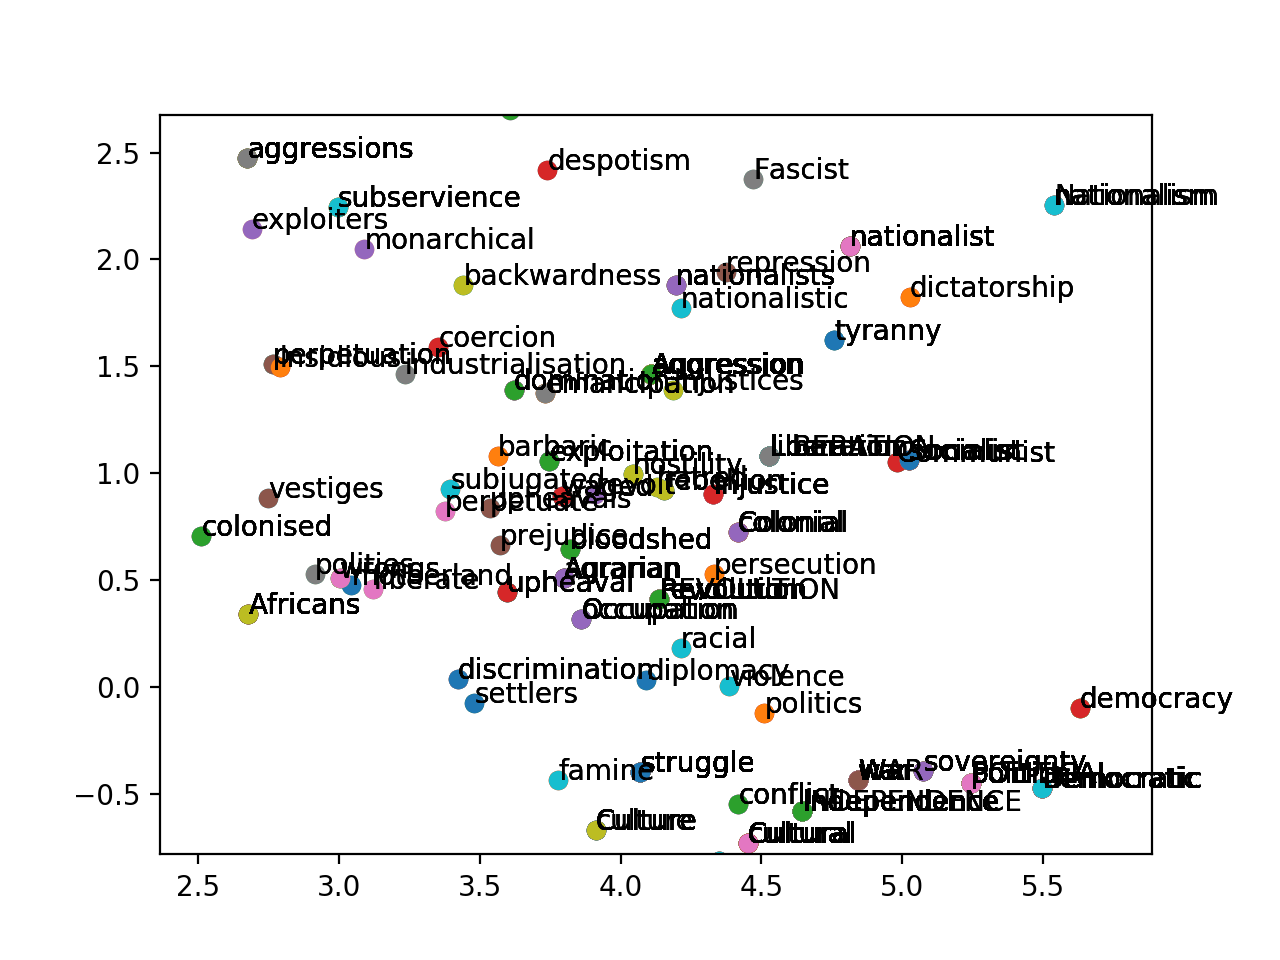

In [150]:
docNounVecs_aug_7 = [word.vector for word in test2]
docNounNormVecs_aug_7 = [word.vector_norm for word in test2]
docNounLabels_aug_7 = [word.text for word in test2]
lsa = TruncatedSVD(n_components=2, n_iter=10)
lsaOut = lsa.fit_transform(docNounVecs_aug_7)
lsaOut.shape
%matplotlib notebook
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)):
#     print(docNounLabels_fp[i], xs[i], ys[i], docNounNormVecs_fp[i])
    plt.scatter(xs[i], ys[i])
    plt.annotate(docNounLabels_aug_7[i], (xs[i], ys[i]))

In [ ]:
#WORD2VEC LDA/PCA/TSNE MODEL

In [ ]:
#FASTTEXT LDA/PCA/TSNE MODEL